<a href="https://colab.research.google.com/github/jasminejj08/Data-Science-Analyses/blob/main/DataScience_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Classification

In [ ]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from statsmodels.api import OLS
from imblearn.over_sampling import SMOTE

In [ ]:
#Read the csv file automatically and save it in a dataframe with the name cancer_data
#Set the names for the columns using _
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data'
cancer_data = pd.read_csv(url, names=["class", "age", "menopause", "tumor_size", "inv_nodes", "node_caps",
                                                             "deg_malig", "breast", "breast_quad", "irradiat"], na_values="?")

In [ ]:
#Checking the formatting of the data to make sure that it is correct
cancer_data.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
#Check for NA/NULL values and remove those rows
print(cancer_data.isna().sum())
#Storing the result into a new dataframe called clean_cancer_data
clean_cancer_data = cancer_data.dropna()

class          0
age            0
menopause      0
tumor_size     0
inv_nodes      0
node_caps      8
deg_malig      0
breast         0
breast_quad    1
irradiat       0
dtype: int64


In [ ]:
#Checking the cleaned data format
clean_cancer_data.head()

,class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
#Check the class balancing
clean_cancer_data['class'].value_counts()

no-recurrence-events    196
recurrence-events        81
Name: class, dtype: int64

In [ ]:
#The class entries have a 2.4:1 ratio (no-recurrence : recurrence)
#There is more than double the amount of no-recurrence events as there are recurrence-events
#Which makes this data rather imbalanced.

Text(0.5, 1.0, 'Frequency for Class Attribute')

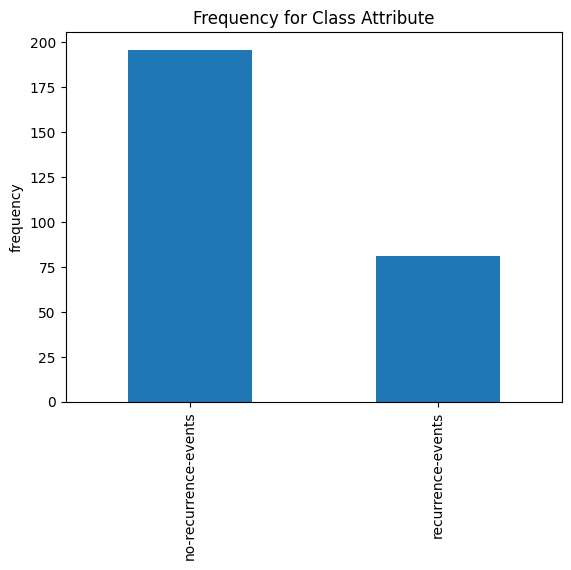

In [ ]:
#Create a bar-plot to display the class attribute frequencies
clean_cancer_data['class'].value_counts().plot(kind="bar") #Use the class attribute
plt.ylabel("frequency") #Set the y-axis label
plt.title("Frequency for Class Attribute") #Set title

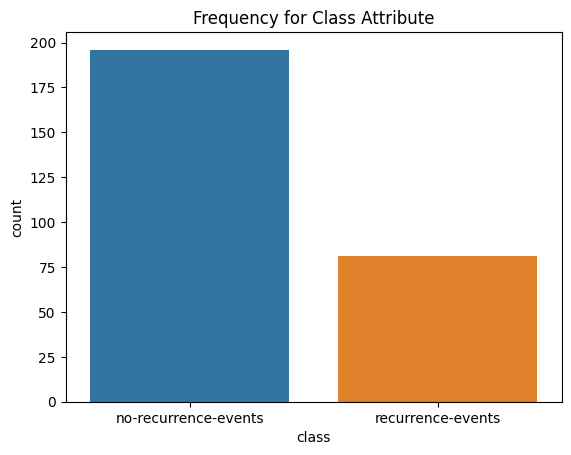

In [ ]:
#Can also create the bar-plot using seaborn
ax = sns.countplot(x='class', data=clean_cancer_data).set(title='Frequency for Class Attribute')

In [ ]:
#Getting ready to build the decision tree
#First, set the independent variables and depedent variable
#The independent variable(s) are all the attributes besides the class attribute
#The dependent variable is the class attribute

ind_vars = ["menopause", "tumor_size", "inv_nodes", "node_caps", "deg_malig", "breast", "breast_quad", "irradiat"]
X = clean_cancer_data[ind_vars] #independent variables
y = clean_cancer_data['class'] #target variable

In [ ]:
#Use one hot encoding to transform the categorical variables into ordinal variables to be used
cancer_data_X = pd.get_dummies(X, drop_first=True)

In [ ]:
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer_data_X, y, test_size=0.2, random_state=0)

In [ ]:
#Create the decision tree using the training data
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)

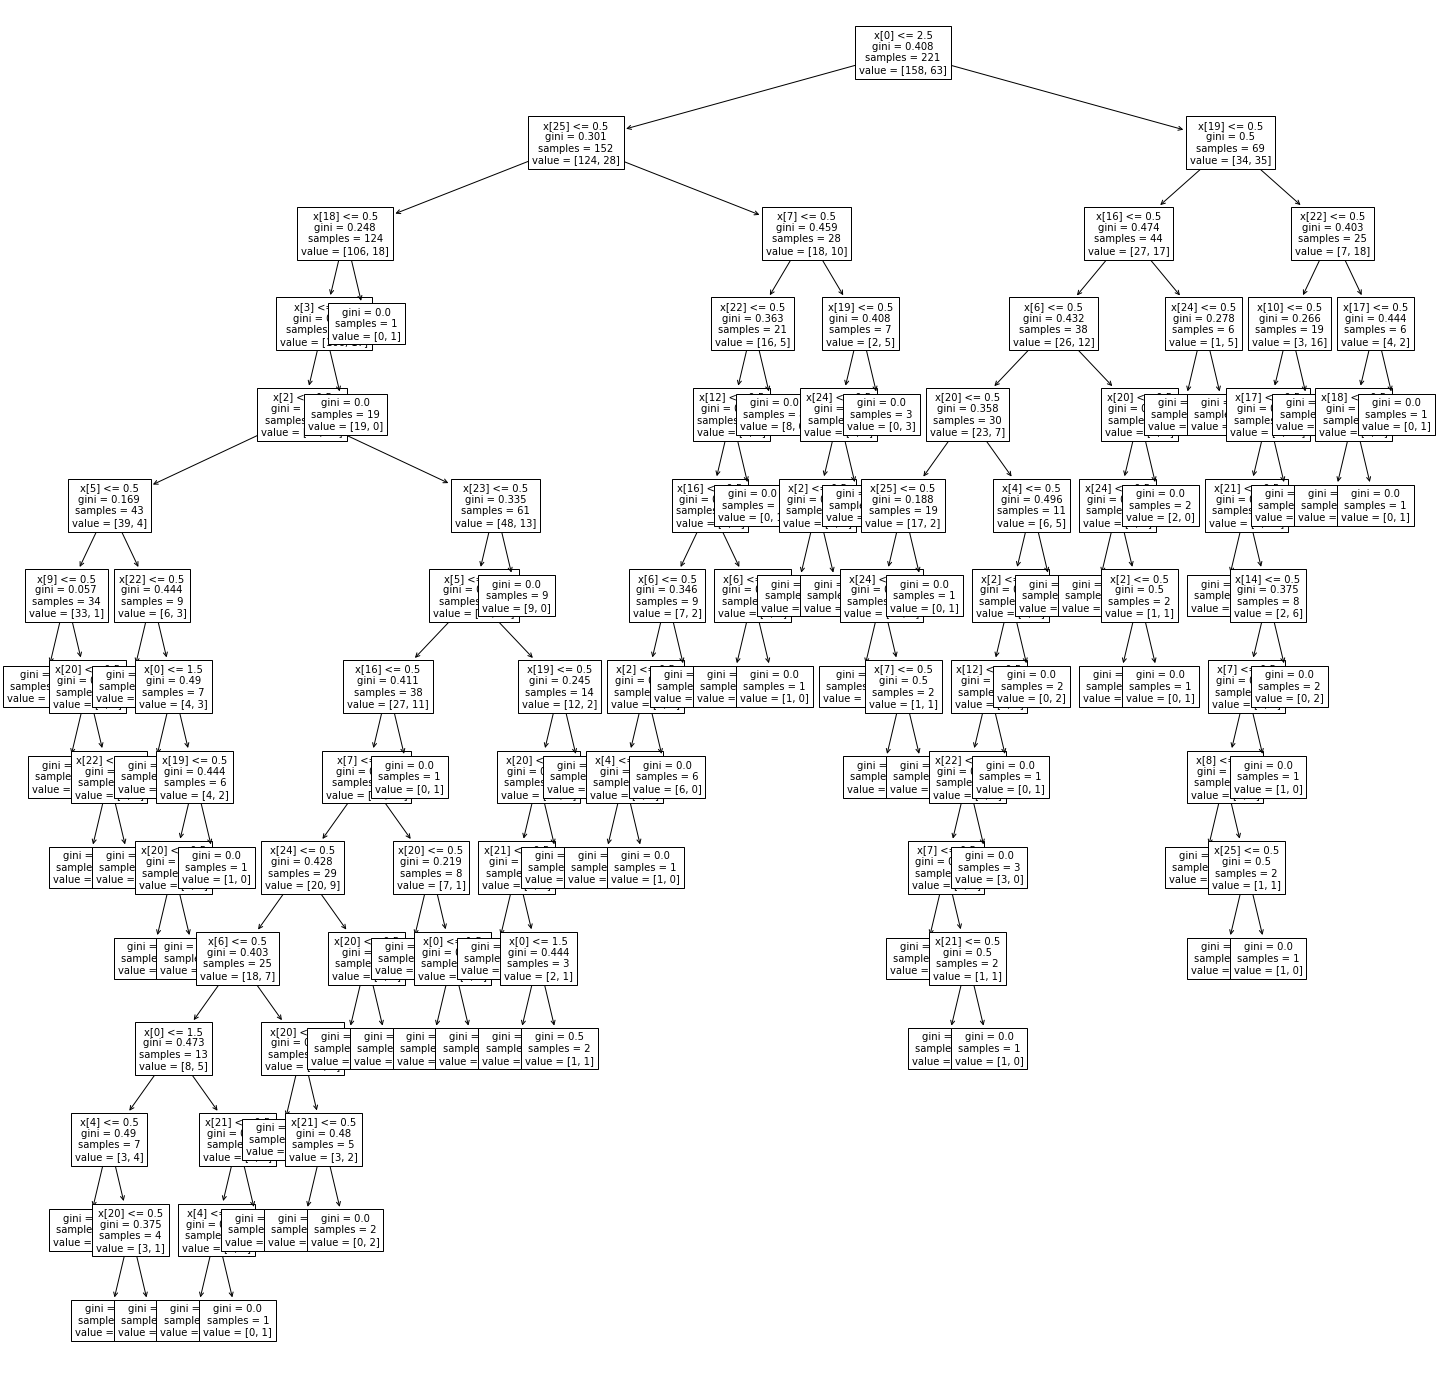

In [ ]:
#Plot and display the decision tree, adjust the font size
plt.figure(figsize=(25,25))
tree.plot_tree(decision_tree, fontsize=10)
plt.show()

In [ ]:
#Predict the target class from the decision tree classifier model
y_pred = decision_tree.predict(X_test)

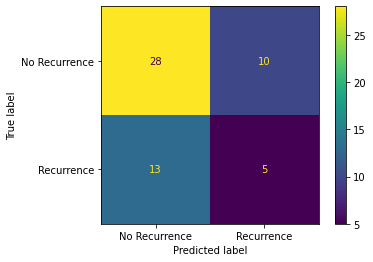

In [ ]:
#Creating the confusion matrix using the predicted target class value
#Plot and display the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = ['No Recurrence', 'Recurrence'])

matrix.plot()
plt.show()

In [ ]:
#Simply printing the confusion matrix out as an array
metrics.confusion_matrix(y_test, y_pred)

array([[28, 10],
       [13,  5]])

In [ ]:
#Displaying the different metrics for the Decision Tree Model
print("ANALYSIS FOR DECISION TREE")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, y_pred, average=None)
print("Precision: (no-reccurrence, recurrence)", precision)
recall = recall_score(y_test, y_pred, average=None)
print("Recall: ", recall)

ANALYSIS FOR DECISION TREE
Accuracy:  0.5892857142857143
Precision: (no-reccurrence, recurrence) [0.68292683 0.33333333]
Recall:  [0.73684211 0.27777778]


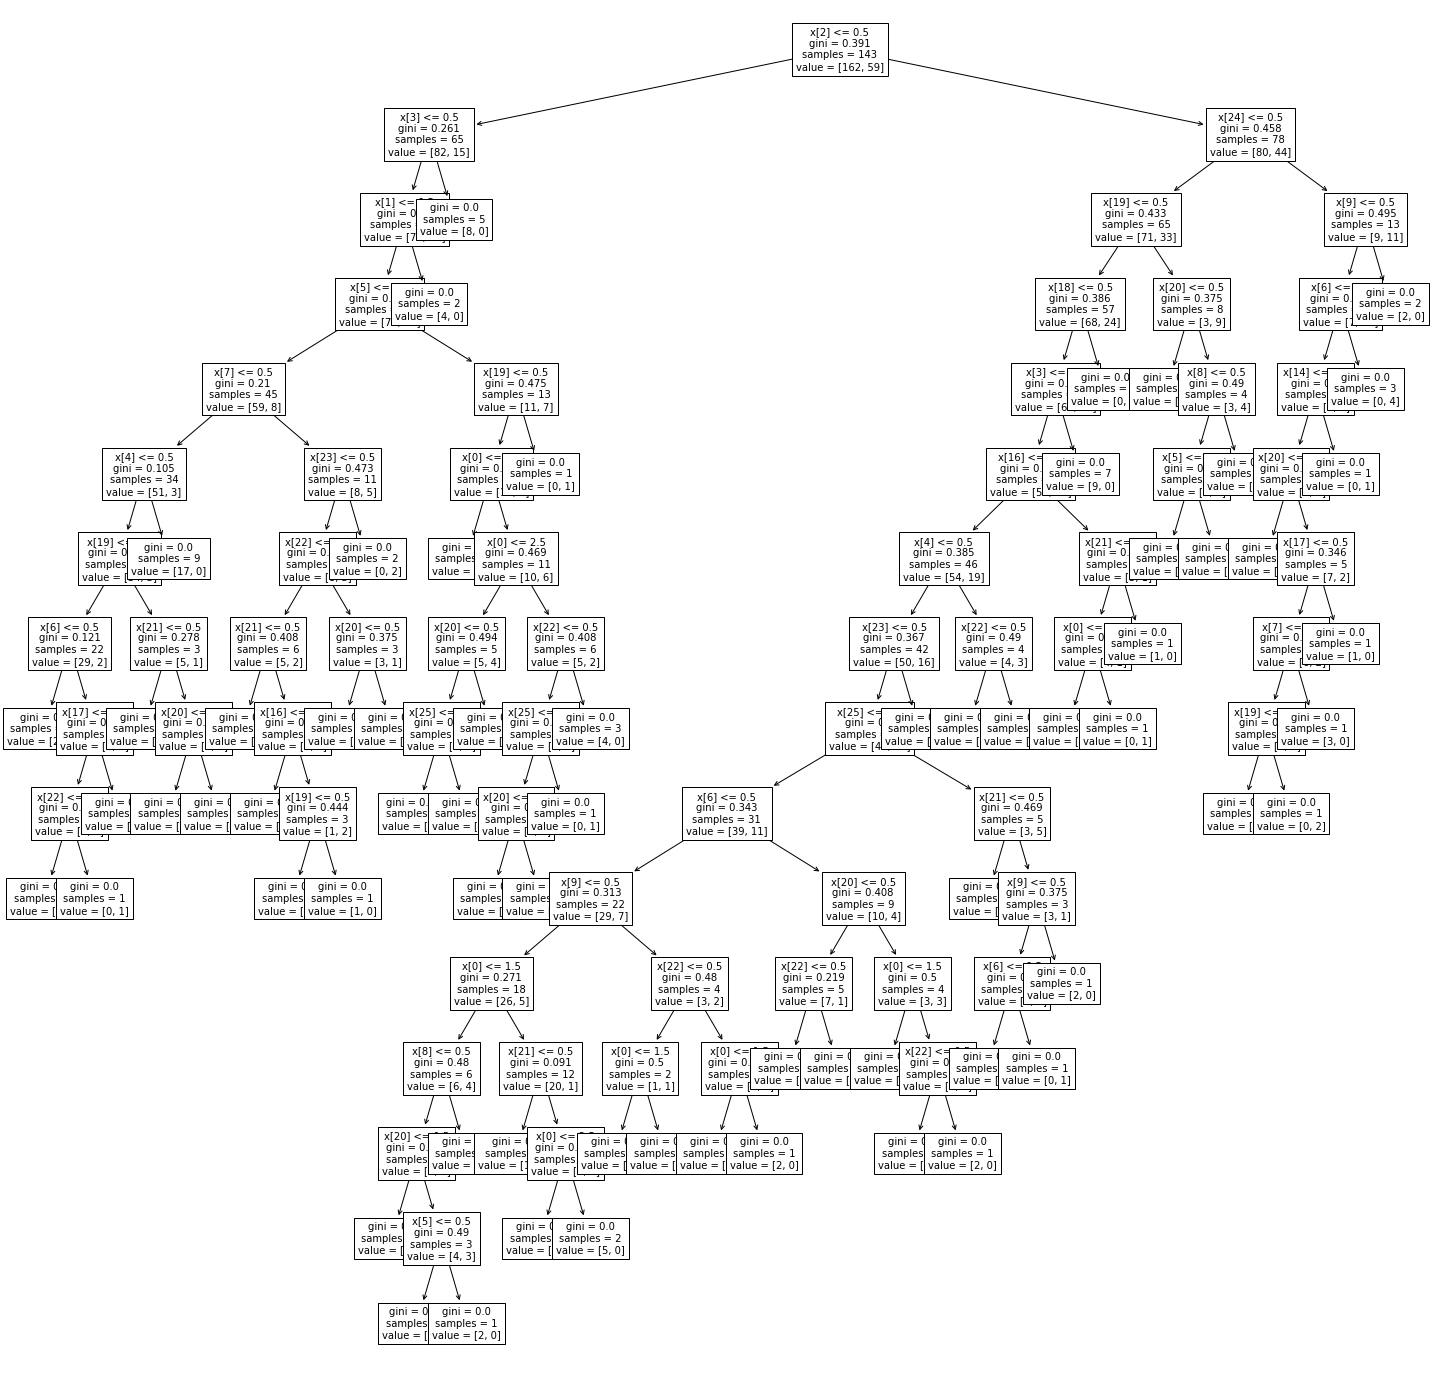

In [ ]:
#Generating the random forest model
forest_tree = RandomForestClassifier(random_state=0)
forest_tree.fit(X_train, y_train)

#Plotting and displaying the random forest model
plt.figure(figsize=(25,25))
plot_tree(forest_tree.estimators_[0], fontsize=10)
plt.show()

In [ ]:
#Predicting the target class using the random forest classifier/model
y_pred2 = forest_tree.predict(X_test)

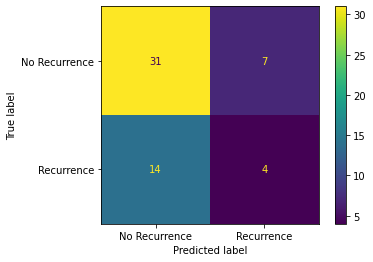

In [ ]:
#Creating the confusion matrix based on the random forest classifier
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred2)
matrix2 = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix2, display_labels = ['No Recurrence', 'Recurrence'])

#Plotting and displaying the confusion matrix
matrix2.plot()
plt.show()

In [ ]:
#Calculating the metrics based on the random forest model
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2, average=None)
recall2 = recall_score(y_test, y_pred2, average=None)

print("ANALYSIS FOR RANDOM FOREST MODEL")
print("Accuracy: ", accuracy2)
print("Precision: (no-recurrence, recurrence)", precision2)
print("Recall: (no-recurrence, recurrence", recall2)

ANALYSIS FOR RANDOM FOREST MODEL
Accuracy:  0.625
Precision: (no-recurrence, recurrence) [0.68888889 0.36363636]
Recall: (no-recurrence, recurrence [0.81578947 0.22222222]


In [ ]:
#Comparing the two models:
#The accuracy of the decision tree model and the random forest model are very similar, with
#the forest tree model having a very slight higher accuracy.
#This follows for the precision and recall as well as the random forest model is very
#slightly above the decision tree model metrics.
#Thus, the random forest model would be better to use, however note that there is not that
#big of a difference between the two in terms of analysis/metrics.

In [ ]:
#Apply SMOTE oversampling to balance the data
smotedata = SMOTE(random_state=42)
X_resampled, y_resampled = smotedata.fit_resample(X_train, y_train)

In [ ]:
#Check that the new sampled data is balanced
pd.Series(y_resampled).value_counts()

recurrence-events       158
no-recurrence-events    158
Name: class, dtype: int64

In [ ]:
#Divide the data into training data again with the new resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

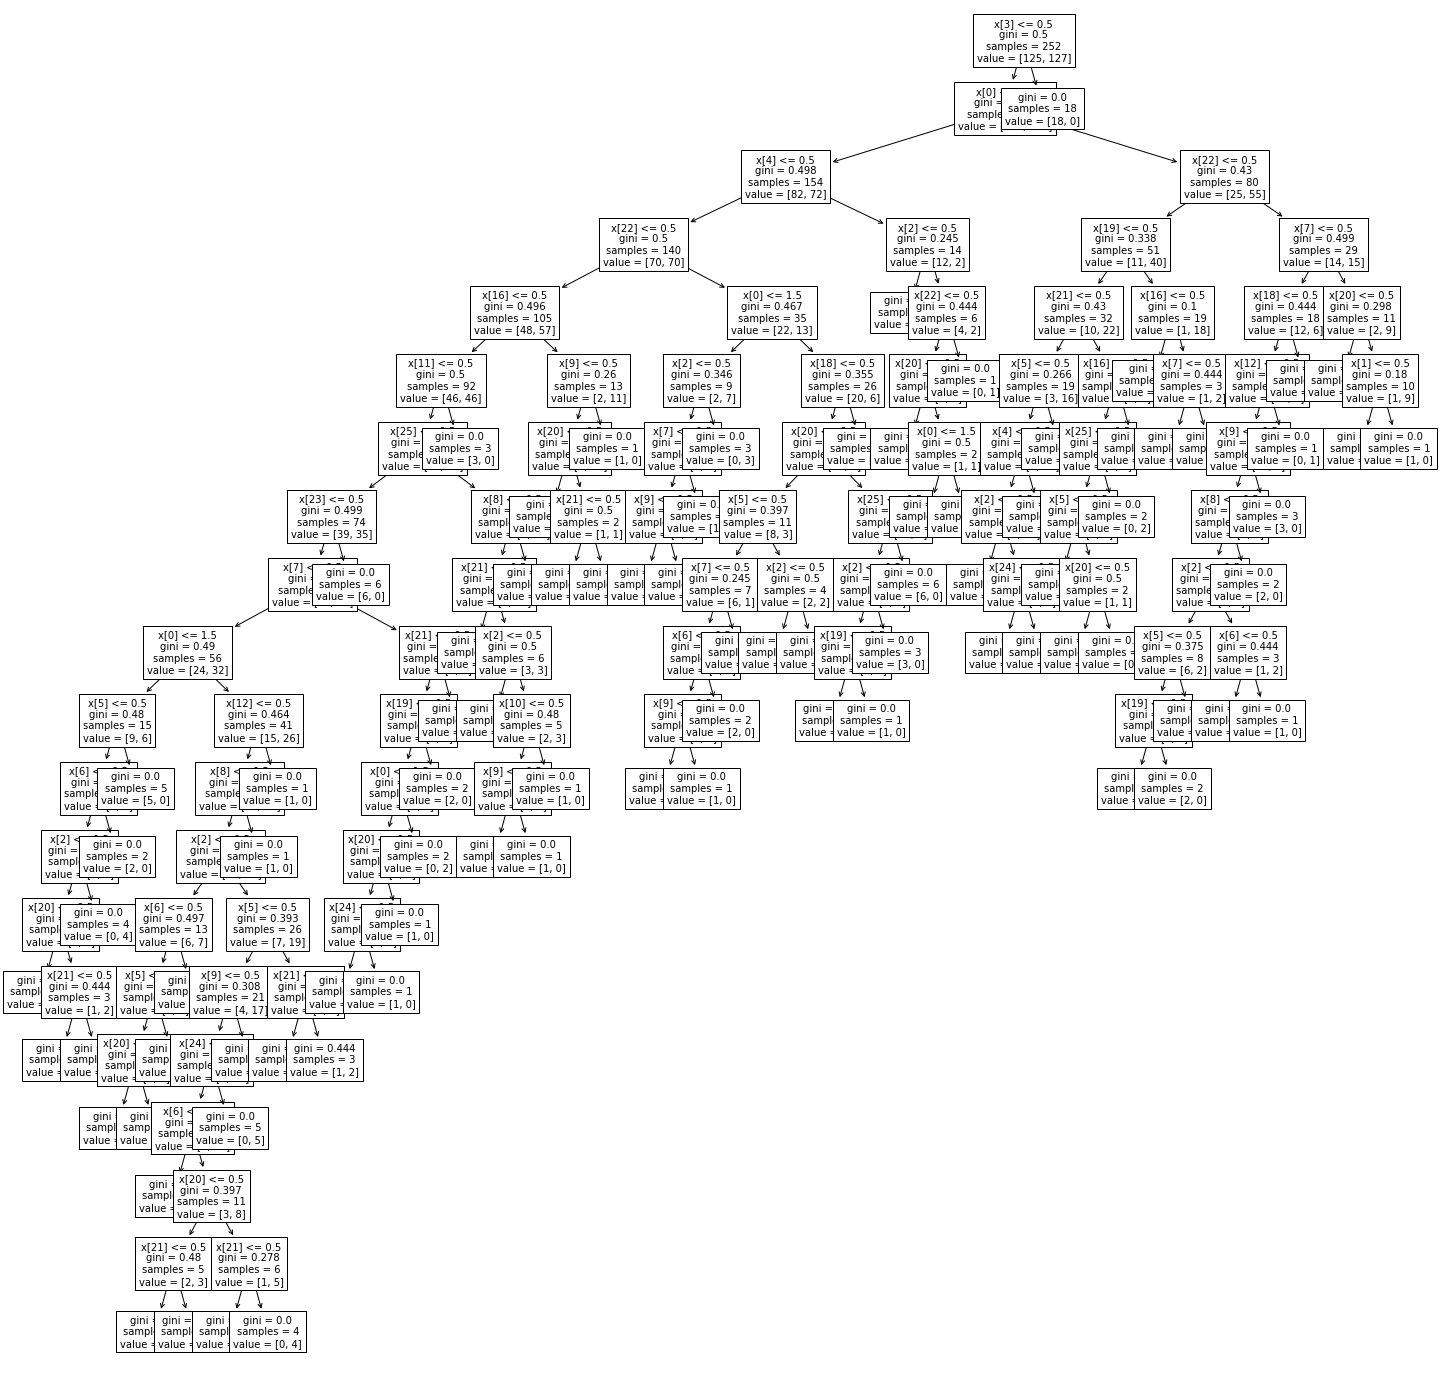

In [ ]:
#Create a new decision tree with the resampled data (smote data)
new_decision_tree = DecisionTreeClassifier()
new_decision_tree.fit(X_train, y_train)
plt.figure(figsize=(25,25))
plot_tree(new_decision_tree, fontsize=10) #Plot the figure and display it
plt.show()

In [ ]:
#Creating a new prediction of the target class after smote based on the new decision tree
new_y_pred = new_decision_tree.predict(X_test)

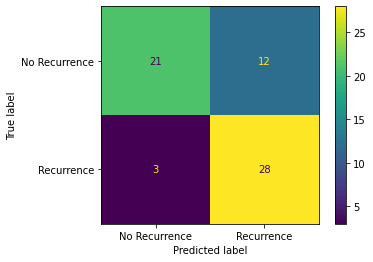

In [ ]:
#Creating a new confusion matrix using thew new target class prediction
new_conmatrix = metrics.confusion_matrix(y_test, new_y_pred)
new_matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=new_conmatrix, display_labels=['No Recurrence', 'Recurrence'])

#Plotting and displaying the new confusion matrix
new_matrix.plot()
plt.show()

In [ ]:
#Calculating the metrics for the decision tree after using smote
print("ANALYSIS FOR DECISION TREE AFTER SMOTE")
accuracy = accuracy_score(y_test, new_y_pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, new_y_pred, average=None)
print("Precision: (no-reccurrence, recurrence)", precision)
recall = recall_score(y_test, new_y_pred, average=None)
print("Recall: (no-recurrence, recurrence)", recall)

ANALYSIS FOR DECISION TREE AFTER SMOTE
Accuracy:  0.765625
Precision: (no-reccurrence, recurrence) [0.875 0.7  ]
Recall: (no-recurrence, recurrence) [0.63636364 0.90322581]


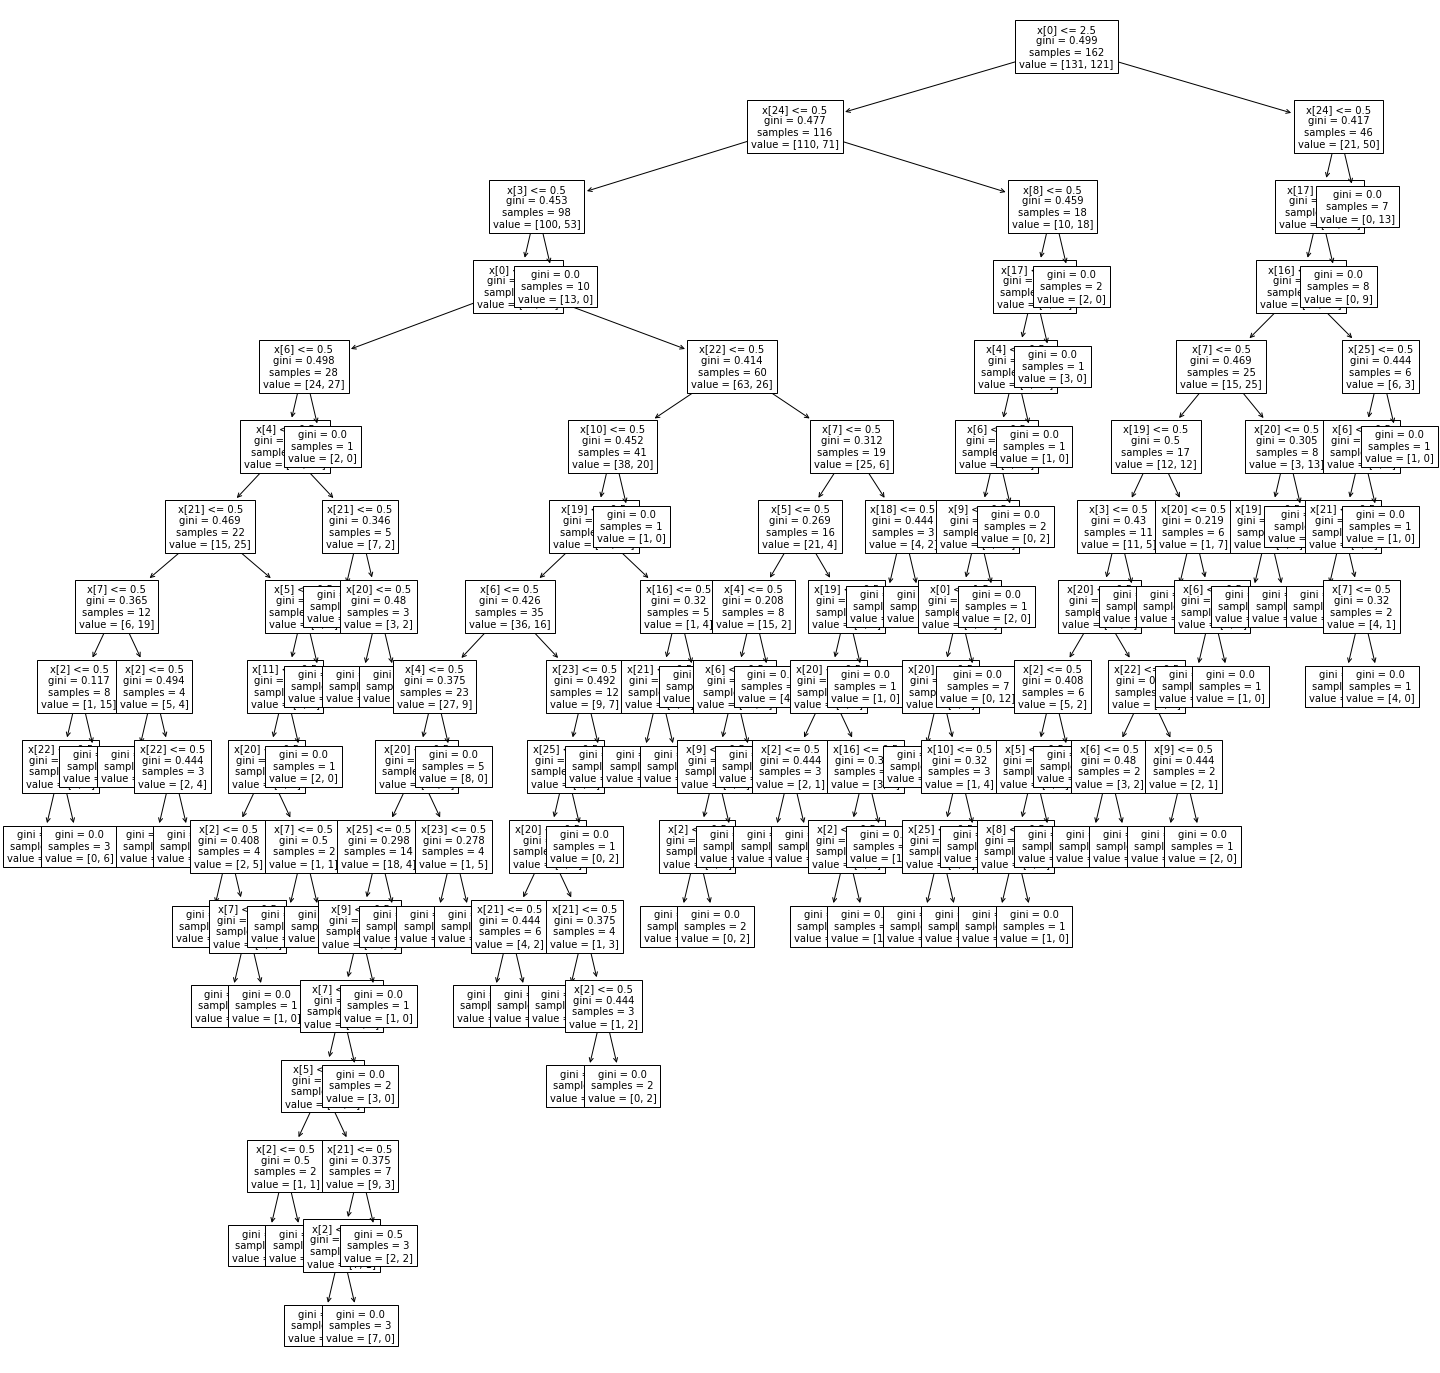

In [ ]:
#Creating a new random forest model based on the resampled data
new_forest = RandomForestClassifier(random_state=0)
new_forest.fit(X_train, y_train)

#Plotting and displaying the random forest model
plt.figure(figsize=(25,25))
plot_tree(new_forest.estimators_[0], fontsize=10)
plt.show()

In [ ]:
#Making a new prediction of the target class based on the random forest classifier/model
new_pred_y2 = new_forest.predict(X_test)

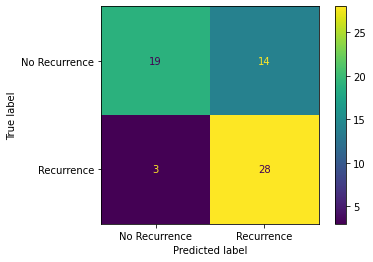

In [ ]:
#Creating a new confusion matrix using the new prediction
new_cfm2 = metrics.confusion_matrix(y_test, new_pred_y2)
new_m2 = metrics.ConfusionMatrixDisplay(confusion_matrix=new_cfm2, display_labels=['No Recurrence', 'Recurrence'])

#Plotting and displaying the confusion matrix based on the random forest model
new_m2.plot()
plt.show()

In [ ]:
#Calculating the other metrics for the random forest after using smote
accuracy = accuracy_score(y_test, new_pred_y2)
precision = precision_score(y_test, new_pred_y2, average=None)
recall = recall_score(y_test, new_pred_y2, average=None)

print("ANALYSIS FOR RANDOM FOREST AFTER SMOTE")
print("Accuracy: ", accuracy)
print("Precision: (non-recurrence, recurrence)", precision)
print("Recall: (non-recurrence, recurrence)", recall)

ANALYSIS FOR RANDOM FOREST AFTER SMOTE
Accuracy:  0.734375
Precision: (non-recurrence, recurrence) [0.86363636 0.66666667]
Recall: (non-recurrence, recurrence) [0.57575758 0.90322581]


In [ ]:
#Comparing the decision tree model metrics to random forest model metrics after SMOTE:
#The accuracy of the decision tree model is actually higher than that of the random forest
#model, as well as the precision and recall. Thus it would be more advantageous to use the
#decision tree model after using SMOTE to balance the data.

In [ ]:
#Comparing results of balanced data to original dataset:
#The accuracy of the results of the balanced data is significantly better than that
#of the original dataset (nearly a 0.2 (2%) increase). The balanced data provides
#a much more accurate representation of what we are trying to discover.
#The confusion matrix of the balanced dataalso shows that there are less errors when it comes to predicting
#the class attribute from the models compared to the original data. It would be best to use this balanced data
#compared to the original dataset as it was quite imbalanced before.